In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("D://2024 Erasmus NNRL/HVAC_dataset.csv")
data.fillna(method="bfill", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  25632 non-null  object 
 1   on_off                25632 non-null  float64
 2   damper                25632 non-null  float64
 3   active_energy         25630 non-null  float64
 4   co2_1                 25632 non-null  float64
 5   amb_humid_1           25632 non-null  float64
 6   active_power          25632 non-null  float64
 7   pot_gen               25630 non-null  float64
 8   high_pressure_1       25632 non-null  float64
 9   high_pressure_2       25632 non-null  float64
 10  low_pressure_1        25632 non-null  float64
 11  low_pressure_2        25632 non-null  float64
 12  high_pressure_3       25632 non-null  float64
 13  low_pressure_3        25632 non-null  float64
 14  outside_temp          25632 non-null  float64
 15  outlet_temp        

C:\Users\PC}\AppData\Local\Temp\ipykernel_21720\2251376125.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)


In [6]:
data.Date.isna().sum()

0

In [8]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
data.set_index('Date', inplace=True)

C:\Users\PC}\AppData\Local\Temp\ipykernel_21720\1946813749.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
C:\Users\PC}\AppData\Local\Temp\ipykernel_21720\1946813749.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)


In [10]:
data.index

DatetimeIndex(['2022-01-06 00:00:00', '2022-01-06 00:05:00',
               '2022-01-06 00:10:00', '2022-01-06 00:15:00',
               '2022-01-06 00:20:00', '2022-01-06 00:25:00',
               '2022-01-06 00:30:00', '2022-01-06 00:35:00',
               '2022-01-06 00:40:00', '2022-01-06 00:45:00',
               ...
               '2022-08-30 23:10:00', '2022-08-30 23:15:00',
               '2022-08-30 23:20:00', '2022-08-30 23:25:00',
               '2022-08-30 23:30:00', '2022-08-30 23:35:00',
               '2022-08-30 23:40:00', '2022-08-30 23:45:00',
               '2022-08-30 23:50:00', '2022-08-30 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=25632, freq=None)

In [14]:
for c in data.columns:
    cats = data[c].unique()
    if len(cats) < 50:
        print(c, cats)

on_off [0. 1.]
amb_humid_1 [35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 34. 33. 32.
 50. 51.  0. 31. 30. 29. 52. 53. 28. 27. 26. 25. 24. 54. 55. 56. 57. 58.
 59. 60. 61. 62.]
summer_setpoint_temp [22.5 22.  22.1 22.9 22.2 22.8 23.  22.3 22.6 22.7 25.  23.5 24.  24.5
 24.1 23.6 24.8 24.2]
winter_setpoint_temp [18.  22.  19.5 18.5 20.  20.5]


In [49]:
data.head()

,on_off,damper,active_energy,co2_1,amb_humid_1,active_power,pot_gen,high_pressure_1,high_pressure_2,low_pressure_1,low_pressure_2,high_pressure_3,low_pressure_3,outside_temp,outlet_temp,inlet_temp,summer_setpoint_temp,winter_setpoint_temp,amb_temp_2
Date,,,,,,,,,,,,,,,,,,,
2022-01-06 00:00:00,0.0,0.0,363150.69,975.0,35.0,0.36,4.0,15.09,15.0,15.27,15.1,15.2,15.2,23.4,24.2,22.8,22.5,18.0,23.4
2022-01-06 00:05:00,0.0,0.0,363150.78,977.0,35.0,0.36,4.0,15.03,14.9,15.21,15.0,15.2,15.1,23.3,24.2,22.7,22.5,18.0,23.3
2022-01-06 00:10:00,0.0,0.0,363150.78,975.0,35.0,0.36,4.0,15.03,14.8,15.15,15.0,15.1,15.1,23.1,24.1,22.5,22.5,18.0,23.4
2022-01-06 00:15:00,0.0,0.0,363150.78,975.0,35.0,0.36,4.0,14.96,14.8,15.15,14.9,15.1,15.0,23.1,23.9,22.3,22.5,18.0,23.3
2022-01-06 00:20:00,0.0,0.0,363150.88,975.0,35.0,0.36,0.0,14.90,14.7,15.09,14.9,15.0,14.9,22.9,23.9,22.2,22.5,18.0,23.3


<Axes: xlabel='Date'>

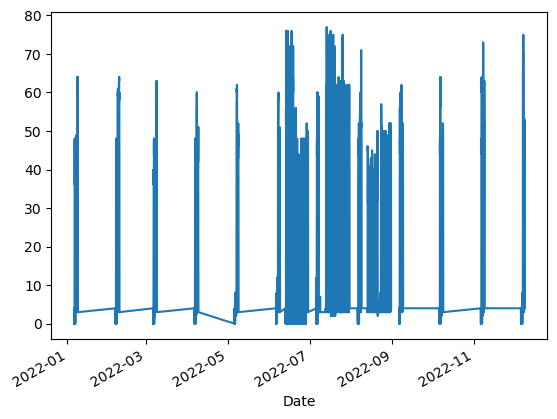

In [178]:
data.pot_gen.plot()

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df.index = data.index

In [63]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [65]:
df.index.day.unique()

Index([6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       7, 30, 8],
      dtype='int32', name='Date')

In [67]:
df.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date')

In [69]:
df.index.year.unique()

Index([2022], dtype='int32', name='Date')

In [71]:
df.index.hour.unique()

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Date')

(1068, 19)


C:\Users\PC}\AppData\Local\Temp\ipykernel_21720\242246407.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
C:\AnacondaD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\AnacondaD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC}\AppData\Local\Temp\ipykernel_21720\242246407.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")
C:\AnacondaD\Lib\site-

Text(0.5, 1.0, 'Temperature Measurement at 8/20')

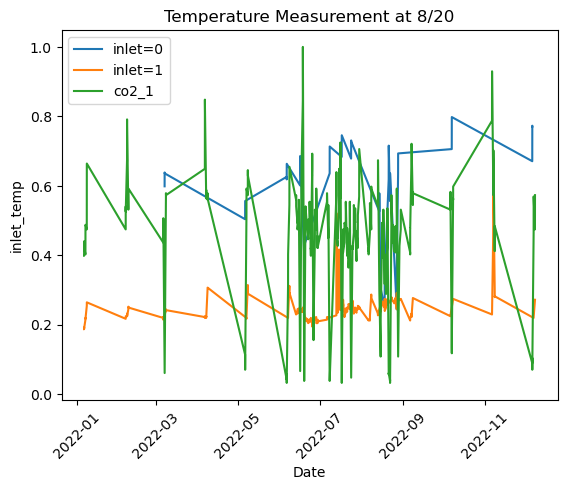

In [188]:
#output_variable = 'outside_temp'
output_variable = 'co2_1'
day = 20
month = 8
year = 2022
hour = 12
filtered_date_df = df[(df.index.hour == hour) & (df.index.hour == hour)]
print(filtered_date_df.shape)

sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")
sns.lineplot(filtered_date_df, x="Date", y=output_variable, label=output_variable)

plt.xticks(rotation=45)
plt.title(f"Temperature Measurement at {month}/{day}")
# sns.lineplot(df[(df.Date.dt.day == 7) & (df.Date.dt.month == 1)], x="Date", y="outlet_temp", label="outlet")

In [75]:
df.columns

Index(['on_off', 'damper', 'active_energy', 'co2_1', 'amb_humid_1',
       'active_power', 'pot_gen', 'high_pressure_1', 'high_pressure_2',
       'low_pressure_1', 'low_pressure_2', 'high_pressure_3', 'low_pressure_3',
       'outside_temp', 'outlet_temp', 'inlet_temp', 'summer_setpoint_temp',
       'winter_setpoint_temp', 'amb_temp_2'],
      dtype='object')

In [77]:
df.max()

on_off                  1.0
damper                  1.0
active_energy           1.0
co2_1                   1.0
amb_humid_1             1.0
active_power            1.0
pot_gen                 1.0
high_pressure_1         1.0
high_pressure_2         1.0
low_pressure_1          1.0
low_pressure_2          1.0
high_pressure_3         1.0
low_pressure_3          1.0
outside_temp            1.0
outlet_temp             1.0
inlet_temp              1.0
summer_setpoint_temp    1.0
winter_setpoint_temp    1.0
amb_temp_2              1.0
dtype: float64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [190]:
features = ["inlet_temp","outside_temp", "amb_humid_1", 'active_power', 'high_pressure_1', 'low_pressure_1']
target = output_variable

X = df[features]
y = df[target]

In [192]:
X.isna().sum()

inlet_temp         0
outside_temp       0
amb_humid_1        0
active_power       0
high_pressure_1    0
low_pressure_1     0
dtype: int64

In [194]:
y.isna().sum()

0

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19224, 6), (6408, 6), (19224,), (6408,))

In [200]:
y.unique()

array([0.03795066, 0.04174573, 0.03225806, 0.04743833, 0.028463  ,
       0.06072106, 0.08538899, 0.09487666, 0.10436433, 0.10815939,
       0.11385199, 0.11764706, 0.12713472, 0.15180266, 0.17457306,
       0.19924099, 0.20872865, 0.21821632, 0.22201139, 0.23149905,
       0.24667932, 0.27514231, 0.29411765, 0.30740038, 0.33206831,
       0.34155598, 0.35104364, 0.37950664, 0.39848197, 0.40227704,
       0.40796964, 0.41745731, 0.42694497, 0.43074004, 0.4402277 ,
       0.43643264, 0.39278937, 0.38899431, 0.37001898, 0.35483871,
       0.36053131, 0.36432638, 0.34535104, 0.32637571, 0.31309298,
       0.32258065, 0.30360531, 0.29791271, 0.31688805, 0.37381404,
       0.38330171, 0.41176471, 0.42125237, 0.46489564, 0.47817837,
       0.48387097, 0.48766603, 0.49335863, 0.5256167 , 0.54079696,
       0.54459203, 0.55028463, 0.5540797 , 0.57874763, 0.58823529,
       0.60721063, 0.61100569, 0.61669829, 0.62049336, 0.66413662,
       0.65464896, 0.65844402, 0.64516129, 0.63946869, 0.62618

In [150]:
model = DecisionTreeClassifier()

dev_score = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Model CV Accuracy :{dev_score.mean()}")
print(f"Model Test Accuracy :{test_score}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\AnacondaD\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\AnacondaD\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\AnacondaD\Lib\site-packages\sklearn\tree\_classes.py", line 224, in fit
    check_classification_targets(y)
  File "C:\AnacondaD\Lib\site-packages\sklearn\utils\multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [103]:
model = LinearRegression()
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Model CV Accuracy :{dev_score.mean()}")
print(f"Model Test Accuracy :{test_score}")

Model CV Accuracy :0.9260302648546904
Model Test Accuracy :0.45531299595654817


In [231]:
import torch
import torch.nn as nn

# Define the neural network
class SimpleRegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 4)
        self.fc4 = nn.Linear(4, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [233]:
# Hyperparameters
input_size = 6  # Adjust based on your input features
hidden_size = 32
output_size = 1

# Create the model
model_nn = SimpleRegressionNet(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.01)

In [235]:
inputs = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.float32)

In [237]:
epochs = 200

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model_nn(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

C:\AnacondaD\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([19224])) that is different to the input size (torch.Size([19224, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 0.1550
Epoch [20/200], Loss: 0.0433
Epoch [30/200], Loss: 0.0496
Epoch [40/200], Loss: 0.0431
Epoch [50/200], Loss: 0.0393
Epoch [60/200], Loss: 0.0378
Epoch [70/200], Loss: 0.0373
Epoch [80/200], Loss: 0.0372
Epoch [90/200], Loss: 0.0371
Epoch [100/200], Loss: 0.0371
Epoch [110/200], Loss: 0.0371
Epoch [120/200], Loss: 0.0370
Epoch [130/200], Loss: 0.0370
Epoch [140/200], Loss: 0.0370
Epoch [150/200], Loss: 0.0370
Epoch [160/200], Loss: 0.0370
Epoch [170/200], Loss: 0.0370
Epoch [180/200], Loss: 0.0370
Epoch [190/200], Loss: 0.0370
Epoch [200/200], Loss: 0.0370


In [263]:
validation_data = torch.tensor(X_train[0:200].values, dtype=torch.float32)
validation_labels = torch.tensor(y_train[0:200].values, dtype=torch.float32)

In [275]:
import torch.nn.functional as F

with torch.no_grad():
    
    # Calculate predictions on the validation set
    predictions = model_nn(validation_data).squeeze(1)

    # Calculate loss
    loss = criterion(predictions, validation_labels)

    # Calculate other metrics
    mse = F.mse_loss(predictions, validation_labels)
    rmse = torch.sqrt(mse)
    mae = F.l1_loss(predictions, validation_labels)

    print(f"Validation Loss: {loss.item():.4f}")
    print(f"MSE: {mse.item():.4f}")
    print(f"RMSE: {rmse.item():.4f}")
    print(f"MAE: {mae.item():.4f}")

Validation Loss: 0.0297
MSE: 0.0297
RMSE: 0.1724
MAE: 0.1441
